# Enhancement by Histogram Manipulation

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from math import inf

## Function for converting rgb to gray images

In [2]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return np.round(gray)

## Read and display test image

In [3]:
img = plt.imread('my_cat.jpg')
gray_img = rgb2gray(np.float_(img))

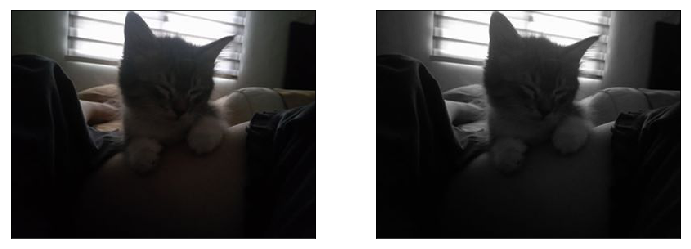

In [4]:
plt.figure(figsize=(12,10))

plt.subplot(121)
plt.imshow(img),plt.xticks([]),plt.yticks([])

plt.subplot(122)
plt.imshow(gray_img,cmap='gray'),plt.xticks([]),plt.yticks([])

plt.show()

## Contrast Stretching

In [5]:
I_max = np.amax(gray_img)
I_min = np.amin(gray_img)

In [6]:
norm_gray = 255*(gray_img - I_min)/(I_max-I_min)

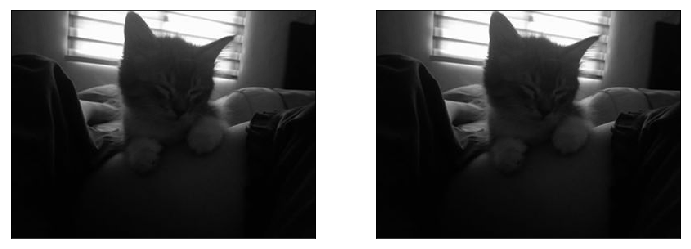

In [7]:
plt.figure(figsize=(12,10))

plt.subplot(121)
plt.imshow(gray_img,cmap='gray'),plt.xticks([]),plt.yticks([])

plt.subplot(122)
plt.imshow(norm_gray,cmap='gray'),plt.xticks([]),plt.yticks([])

# plt.savefig('contrast.png',dpi=300,bbox_inches='tight')
plt.show()

## Normalized Grayscale Histogram of test image

In [8]:
def hist(gray_hist):
    plt.figure(figsize=(7,5))
    bin_vals = plt.hist(gray_hist,256,density=True)[0]
#     plt.savefig('new_histogram_sigmoid.png',dpi=300,bbox_inches='tight')
    plt.show()
    
    return bin_vals

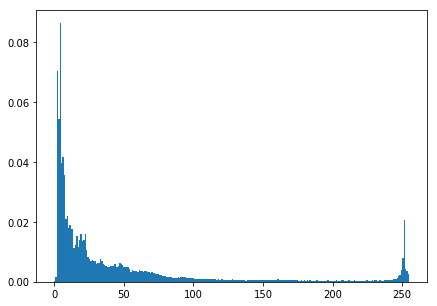

In [9]:
gray_hist = gray_img.flatten()
bin_vals = hist(gray_hist)

## Linear Desired Cumulative Distribution Function

In [10]:
gray_vals = np.sort(np.unique(np.round(gray_hist)))
m,b = np.polyfit(gray_vals,np.linspace(0,1,len(gray_vals)),1)

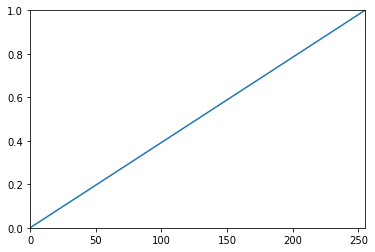

In [11]:
plt.plot(gray_vals,np.linspace(0,1,len(gray_vals)))
plt.xlim(0,255)
plt.ylim(0,1)
plt.show()

## Cumulative Distribution Function of Grayscale Histogram vs Linear CDF

In [57]:
def CDF(bin_vals,linear):
    cdf = np.cumsum(bin_vals)
    
    plt.figure(figsize=(7,5))
    plt.plot(np.arange(len(cdf)),cdf,label='original')
    
    if linear == 'T':
        plt.plot(gray_vals,np.linspace(0,1,len(gray_vals)),'k--',label='expected')
    elif linear == 'F':
        plt.plot(np.arange(256),sigmoid(np.arange(256)),'k--',label='expected')
    
    plt.xlim(0,255)
    plt.ylim(0,1)
    plt.legend(fontsize=12)
#     plt.savefig('new_cdf_sigmoid.png',dpi=300,bbox_inches='tight')
    plt.show()
    
    return cdf

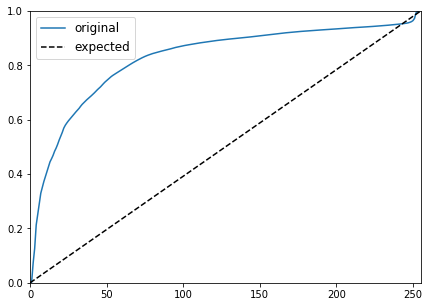

In [58]:
cdf = CDF(bin_vals,'T')

## Backprojecting Image using Linear CDF

In [60]:
new_img = np.round((cdf[np.int_(gray_img)]-b)/m)

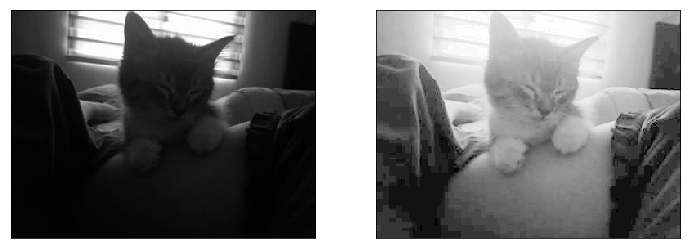

In [61]:
plt.figure(figsize=(12,10))

plt.subplot(121)
plt.imshow(norm_gray,cmap='gray'),plt.xticks([]),plt.yticks([])

plt.subplot(122)
plt.imshow(new_img,cmap='gray'),plt.xticks([]),plt.yticks([])

# plt.savefig('backproject.png',dpi=300,bbox_inches='tight')
plt.show()

## Histogram and CDF of new enhance image vs Linear CDF

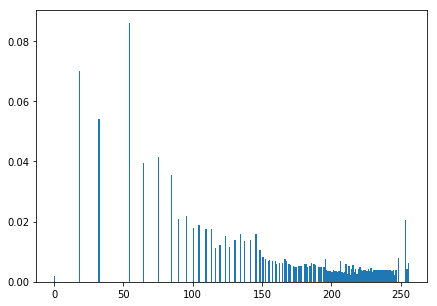

In [62]:
new_bin_vals = hist(new_img.flatten())

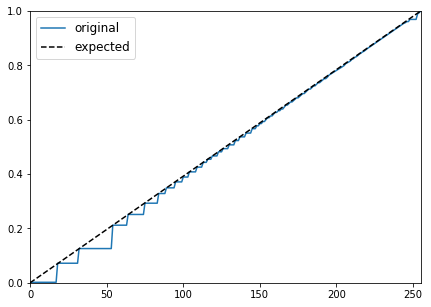

In [63]:
new_cdf = CDF(new_bin_vals,'T')

## Nonlinear (Sigmoid) Desired CDF

In [64]:
def sigmoid(x):   
    return 1/(np.exp(-0.1*(x-127.5))+1)

In [65]:
def inverse_sigmoid(x):
    return np.log(x/(1-x))/(0.000001)

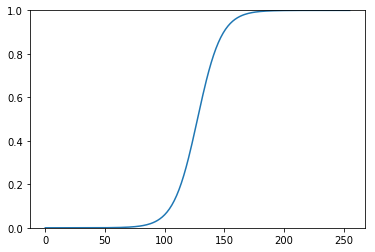

In [66]:
plt.plot(np.arange(256),sigmoid(np.arange(256)))
# plt.xlim(0,255)
plt.ylim(0,1)

plt.show()

## Inverse Sigmoid CDF

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


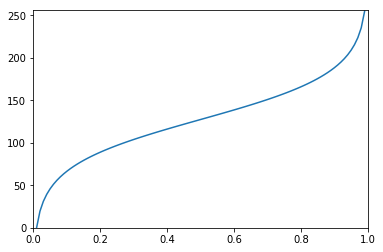

In [67]:
x_vals = np.linspace(0,1,100)
logits = inverse_sigmoid(x_vals)
norm_logits = (logits-min(logits[logits!=-inf]))/(max(logits[logits!=inf])-min(logits[logits!=-inf]))

plt.plot(x_vals,255*norm_logits)
plt.xlim(0,1)
plt.ylim(0,256)
plt.show()

## Backprojecting Image using Nonlinear CDF

In [68]:
new_image = inverse_sigmoid(cdf[np.int_(gray_img)])
norm_image = np.round(255*(new_image-min(new_image[new_image!=-inf]))/(max(new_image[new_image!=inf])-min(new_image[new_image!=-inf])))

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


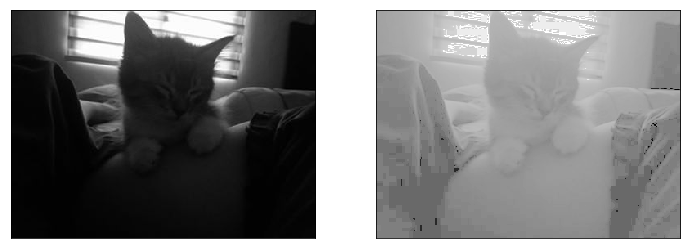

In [69]:
plt.figure(figsize=(12,10))

plt.subplot(121)
plt.imshow(norm_gray,cmap='gray'),plt.xticks([]),plt.yticks([])

plt.subplot(122)
plt.imshow(new_image,cmap='gray'),plt.xticks([]),plt.yticks([])

# plt.savefig('backproject_sigmoid.png',dpi=300,bbox_inches='tight')
plt.show()

## Histogram and CDF of new enhance image vs Nonlinear CDF

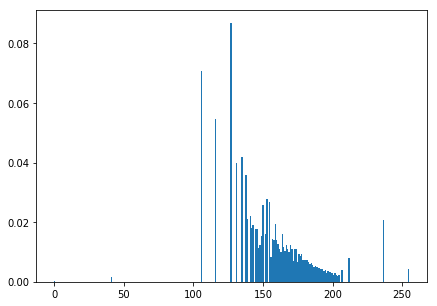

In [70]:
new_bin_vals = hist(norm_image.flatten())

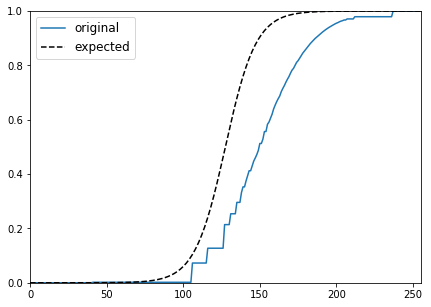

In [71]:
new_cdf = CDF(new_bin_vals,'F')